# ARIMA MODEL 

In [13]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
# from keras.models import Sequential
# from keras.layers import Dense

# from keras.optimizers import Adam

warnings.filterwarnings('ignore')

## Preprocessing 

In [14]:
czech  = pd.read_csv('univariate_models/czechia_diff.csv')
eston  = pd.read_csv('univariate_models/estonia_diff.csv')
franc  = pd.read_csv('univariate_models/france_diff.csv')
malay  = pd.read_csv('univariate_models/malaysia_diff.csv')
belgi  = pd.read_csv('univariate_models/univariate_df_Belgium.csv')
chile  = pd.read_csv('univariate_models/univariate_df_Chile.csv')
irela  = pd.read_csv('univariate_models/univariate_df_Ireland.csv')
israe  = pd.read_csv('univariate_models/univariate_df_Israel.csv')
italy  = pd.read_csv('univariate_models/univariate_df_Italy.csv')
usofa  = pd.read_csv('univariate_models/us_diff.csv')


In [15]:
# setting index to the date time value 
def index_dt(c):
    c.set_index('date')

for x in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, usofa]:
    x = index_dt(x)   

## Data Spliting 
In time series prediction, it is crucial to handle the temporal aspect properly when splitting the data into training and testing sets. Unlike random data, time series data has a sequential structure, and random splitting can lead to information leakage and overly optimistic performance estimates.

In [16]:
#sort index
for x in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, usofa]:
    x = x.sort_index()

In [17]:
train_size = int(len(czech) * 0.8)
czech_train, czech_test = czech[0:train_size], czech[train_size:]
eston_train, eston_test = eston[0:train_size], eston[train_size:]
franc_train, franc_test = franc[0:train_size], franc[train_size:]
malay_train, malay_test = malay[0:train_size], malay[train_size:]
belgi_train, belgi_test = belgi[0:train_size], belgi[train_size:]
chile_train, chile_test = chile[0:train_size], chile[train_size:]
irela_train, irela_test = irela[0:train_size], irela[train_size:]
israe_train, israe_test = israe[0:train_size], israe[train_size:]
italy_train, italy_test = italy[0:train_size], italy[train_size:]
us_train, us_test = usofa[0:train_size], usofa[train_size:]
us_test

,Unnamed: 0,date,new_deaths
161,261092,2023-04-02,-338.0
162,261099,2023-04-09,-17.0
163,261106,2023-04-16,-439.0
164,261113,2023-04-23,-92.0
165,261120,2023-04-30,-152.0
166,261127,2023-05-07,100.0
167,261134,2023-05-14,797.0
168,261141,2023-05-21,-1188.0
169,261148,2023-05-28,-17.0
170,261155,2023-06-04,-49.0


## Model and Tuning

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model=ARIMA(czech_train['new_deaths'],order=(1,1,1))
cmodel_fit=model.fit()

In [20]:
cmodel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -912.693
Date:                Thu, 22 Feb 2024   AIC                           1831.386
Time:                        15:52:54   BIC                           1840.611
Sample:                             0   HQIC                          1835.132
                                - 161                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6705      0.051     13.051      0.000       0.570       0.771
ma.L1         -0.9999     12.956     -0.077      0.938     -26.394      24.394
sigma2      5025.1003   6.51e+04      0.077      0.938   -1.23e+05    1.33e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.18   Jarque-Bera (JB):               495.38
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                            -1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

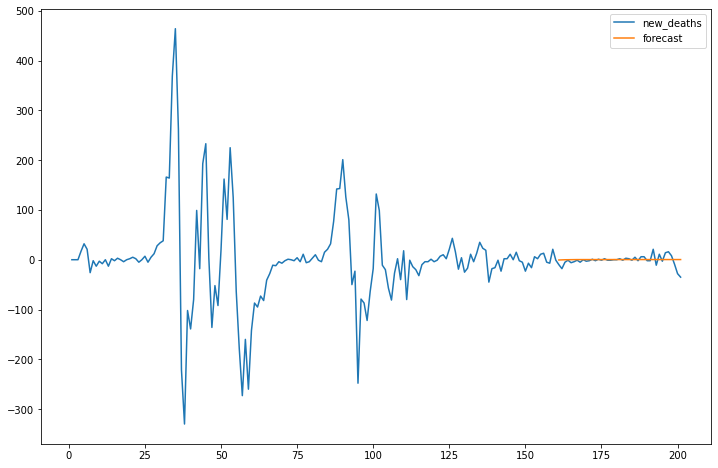

In [22]:
czech['forecast']=cmodel_fit.predict(start=161,end=201,dynamic=True)
czech[['new_deaths','forecast']].plot(figsize=(12,8))

In [23]:
model=ARIMA(eston_train['new_deaths'],order=(1,1,1))
emodel_fit=model.fit()

<Axes: >

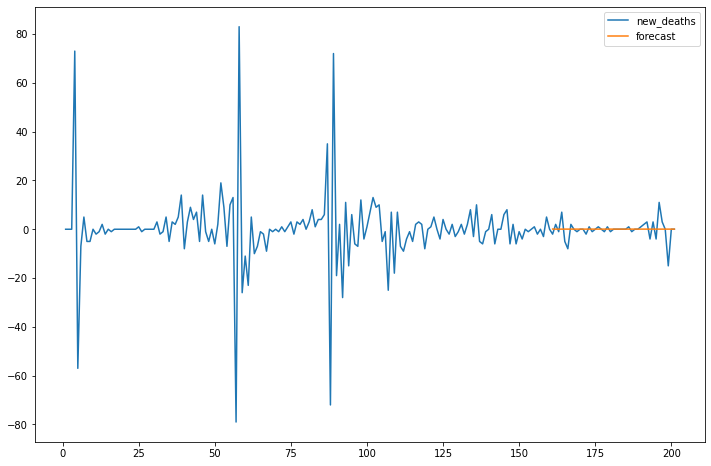

In [24]:
eston['forecast']=emodel_fit.predict(start=161,end=201,dynamic=True)
eston[['new_deaths','forecast']].plot(figsize=(12,8))

<Axes: >

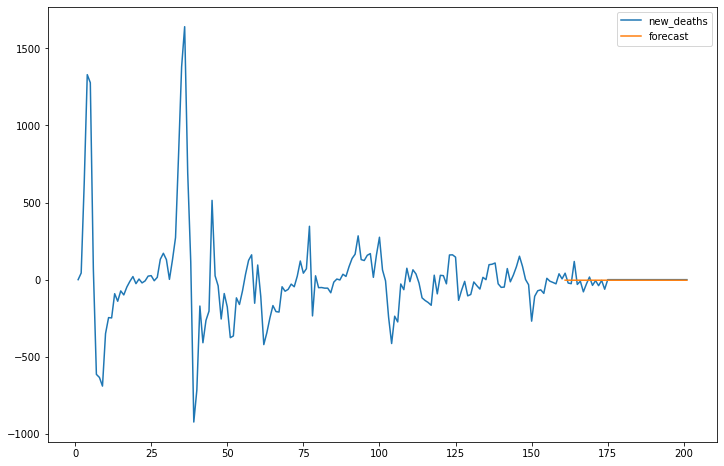

In [25]:
model=ARIMA(franc_train['new_deaths'],order=(1,1,1))
fmodel_fit=model.fit()
franc['forecast']=fmodel_fit.predict(start=161,end=201,dynamic=True)
franc[['new_deaths','forecast']].plot(figsize=(12,8))

<Axes: >

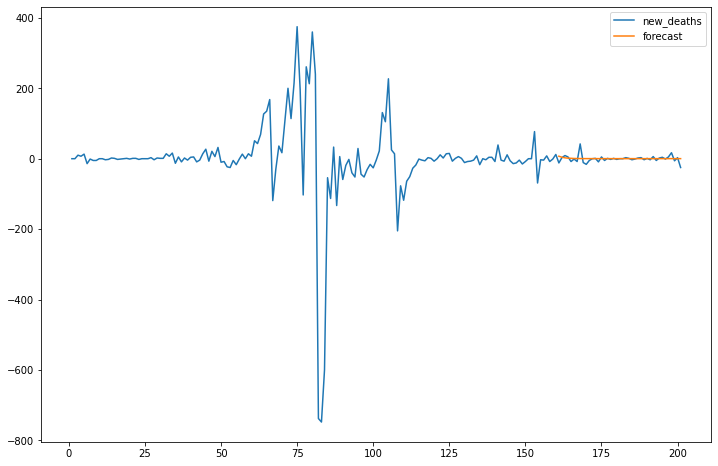

In [26]:
model=ARIMA(malay_train['new_deaths'],order=(1,1,1)) #pdq
mmodel_fit=model.fit()
malay['forecast']=mmodel_fit.predict(start=161,end=201,dynamic=True)
malay[['new_deaths','forecast']].plot(figsize=(12,8))